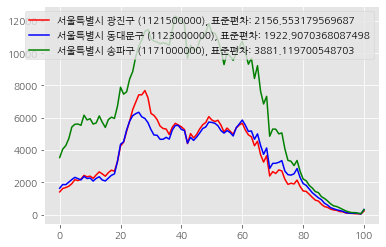

In [1]:
# 실습 1

import csv
import matplotlib.pyplot as plt
import numpy as np

with open("202012_202012_연령별인구현황_월간.csv", 'r', encoding='cp949') as csv_file:
    data = csv.reader(csv_file)
    next(data) # 헤더 제거
    next(data) # 서울시 제거

    csv_list = []
    population_sum = []
    population_ratio = np.empty((0, 101), dtype=int)

    for row in data:
        csv_list.append(row)

    idx = -1
    target_idx = 0
    for row in csv_list:
        idx += 1
        if "광진구" in row[0]:
            target_idx = idx
        for i in range(3, len(row)):
            row[i] = int(row[i].replace(',', ''))
        population_ratio = np.append(population_ratio, np.array([row[3:]]), axis=0)

    for i in range(len(population_ratio)):
        square = np.square(population_ratio[i] - population_ratio[target_idx])
        element_sum = np.sum(square)
        population_sum.append(element_sum)

    # 가장 작은 값
    population_min = 99999999
    for i in population_sum:
        if i == 0:
            continue
        if population_min > i:
            population_min = i

    similar_idx = population_sum.index(population_min)
    different_idx = population_sum.index(max(population_sum))

    plt.rc('font', family='NanumGothic')
    plt.style.use("ggplot")
    plt.plot(population_ratio[target_idx], color='red', label=csv_list[target_idx][0]+", 표준편차: "+str(np.std(population_ratio[target_idx])))
    plt.plot(population_ratio[similar_idx], color='blue', label=csv_list[similar_idx][0]+", 표준편차: "+str(np.std(population_ratio[similar_idx])))
    plt.plot(population_ratio[different_idx], color='green', label=csv_list[different_idx][0]+", 표준편차: "+str(np.std(population_ratio[different_idx])))
    plt.legend()
    plt.show()
